<a href="https://colab.research.google.com/github/chandbud5/Machine-Learning-with-Sklearn/blob/master/Hierarchical%20Clustering/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import datasets, preprocessing, manifold
from sklearn.cluster import AgglomerativeClustering

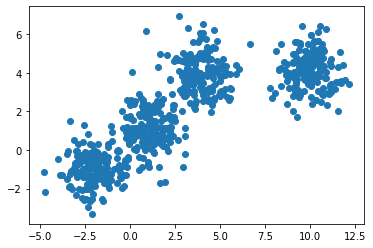

In [2]:
X, Y = datasets._samples_generator.make_blobs(n_samples=700,
                centers=[[4,4], [-2,- 1], [1,1], [10,4]], cluster_std=0.9)
# larger the cluster_std more apart the clusters will be choose it b/w 0.5-1.5

plt.scatter(X[:,0], X[:,1], marker='o')
plt.savefig("dataset.png",dpi=600)
plt.show()

In [3]:
scale = preprocessing.MinMaxScaler()
X = scale.fit_transform(X)

model = AgglomerativeClustering(n_clusters=4,linkage='complete')
model.fit(X,Y)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [7]:
p = model.fit_predict(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


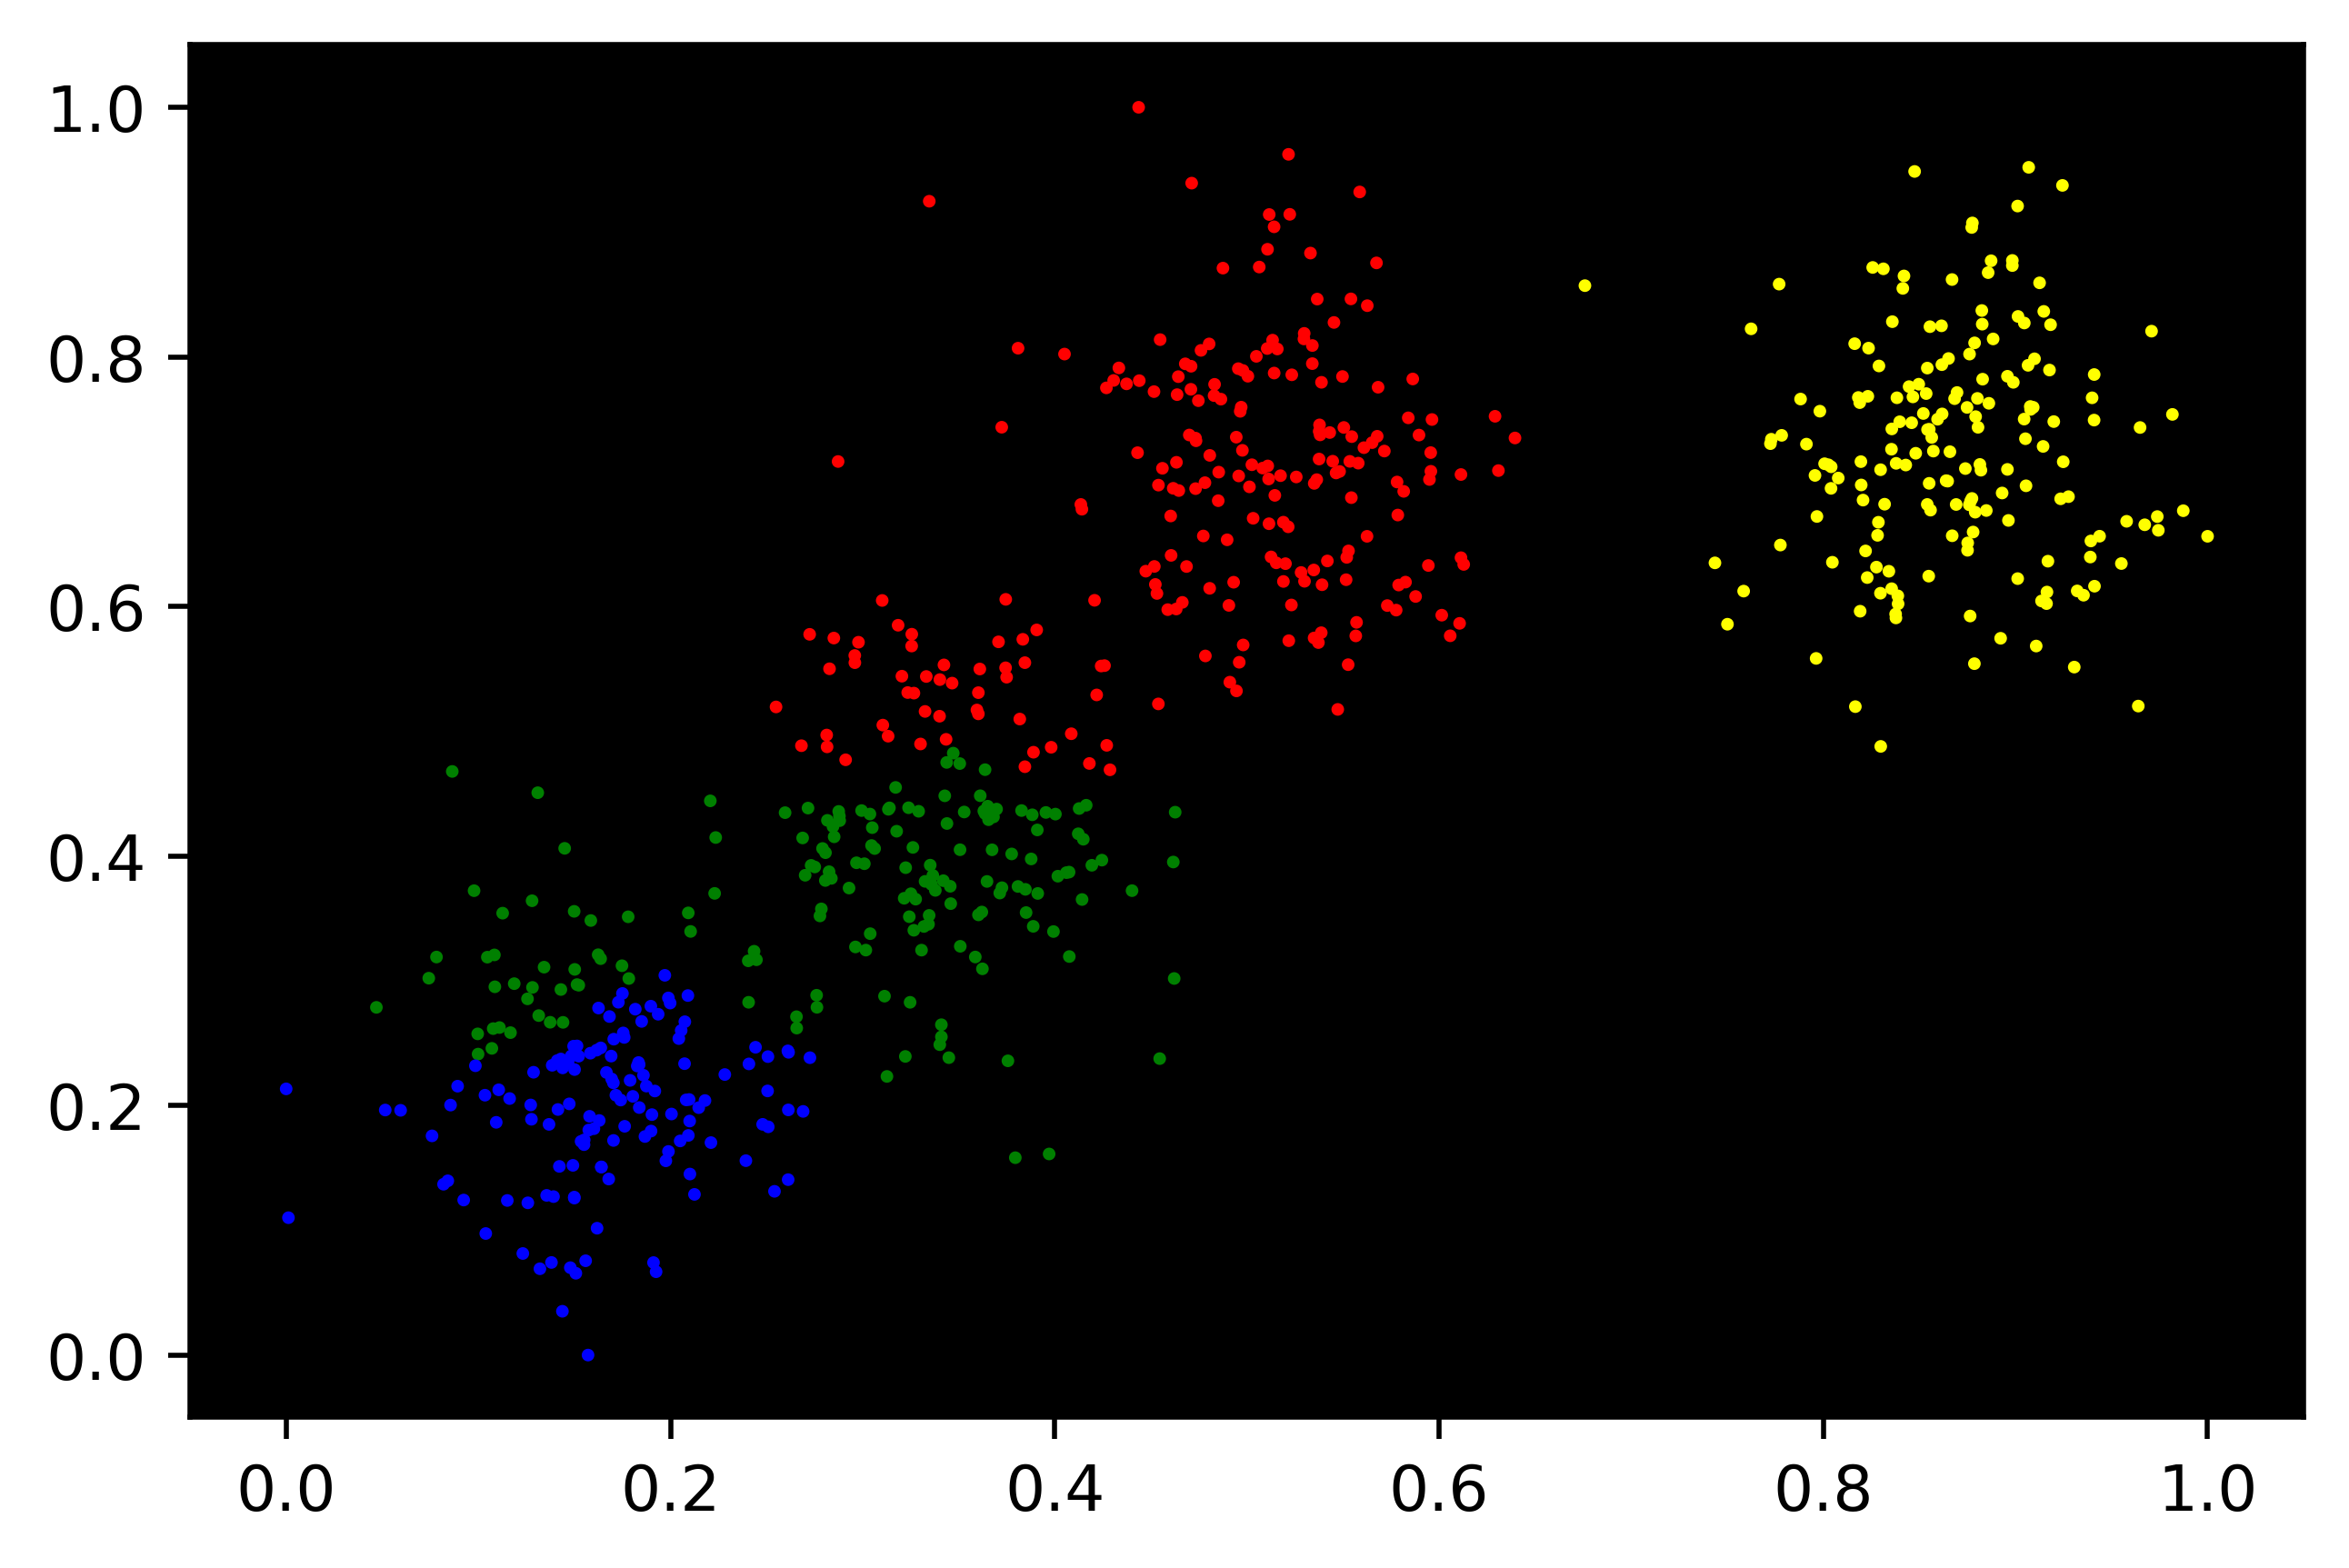

In [8]:
# plotting data with their clusters
plt.figure(figsize=(6,4), dpi=500)
plt.scatter(X[:,0], X[:,1],p==0 ,color='red')
plt.scatter(X[:,0], X[:,1],p==1 ,color='green')
plt.scatter(X[:,0], X[:,1],p==2 ,color='yellow')
plt.scatter(X[:,0], X[:,1],p==3 ,color='blue')
ax = plt.axes()
ax.set_facecolor("black")
plt.savefig("clusters.png",dpi=500)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


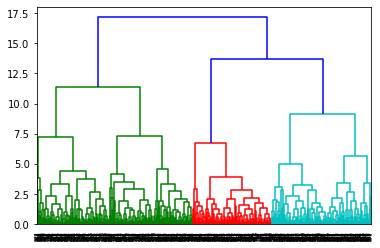

In [9]:
# Finding Dendrogram
dist_mat = distance_matrix(X,X)
z = hierarchy.linkage(dist_mat,'complete')
dendro = hierarchy.dendrogram(z)
plt.savefig("dendrogram.png",dpi=500)
plt.show()